<img src="../.images/logosnb.png" alt="Banner" style="width: 800px;"/>

<div style='color: #690027;' markdown="1">
    <h1>CONVOLUTIES</h1> 
</div>

<div class="alert alert-box alert-success">
Met convoluties kan je op zoek gaan naar verschillende kenmerken in een afbeelding. Je kan er bv. randen mee detecteren, ruis in een beeld mee verminderen of het contrast in een beeld verzachten. Convoluties worden toegepast in de zogenaamde convolutionele netwerken.
</div>

Bronnen:<br> *Image filtering*, http://machinelearninguru.com/computer_vision/basics/convolution/image_convolution_1.html, geraadpleegd op 16/11/2018 <br>
*Convolutions*, Utkarsh Sinha, http://aishack.in/tutorials/image-convolution-examples/, geraadpleegd op 16/11/2018<br> *Image Convolution*, Jamie Ludwig,http://web.pdx.edu/~jduh/courses/Archive/geog481w07/Students/Ludwig_ImageConvolution.pdf,  geraadpleegd op 16/11/2018

<div class="alert alert-box alert-info">
<b>Convolutie werkt door een bepaalde pixel een bepaald gewicht te geven en daaraan gewogen waarden van de omliggende pixels toe te voegen.</b><br> 
Dat gebeurt door een filter als het ware op het beeld te 'leggen'. Zowel de afbeelding als de filter is een matrix. <br> De convolutie is een wiskundige bewerking: de elementen van de filter en de elementen van de matrix van de afbeelding worden elementgewijs vermenigvuldigd en erna worden deze producten opgeteld.<br>
Meer uitleg over de bewerking zelf vind je in de notebook 'Convolutie: het rekenwerk'.
</div>

## Importeren van de nodige modules

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

<div style='color: #690027;' markdown="1">
    <h1>1. Foto's inladen</h1> 
</div>

Bekijk de foto van 'het witte huis' van Sint-Bavohumaniora.

In [31]:
wittehuis =  np.load("../.images/IntroductieDeepLearning/wittehuis.npy")     # foto inladen
print(wittehuis)
print(wittehuis.shape)
print(np.min(wittehuis), np.max(wittehuis))

[[218 218 219 ... 239 239 239]
 [217 218 219 ... 238 238 238]
 [217 219 220 ... 238 238 238]
 ...
 [111 116 119 ...  44  45  50]
 [112 115 115 ...  48  48  51]
 [113 113 112 ...  51  50  51]]
(596, 800)
0 254


Het ingeladen bestand is een matrix. De foto is dus een foto in grijswaarden. Bekijk de foto.

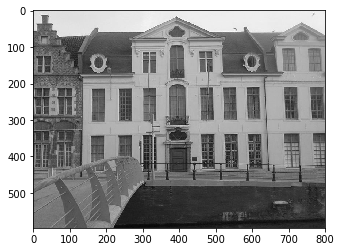

In [29]:
plt.imshow(wittehuis, vmin=0, vmax=255, cmap="gray")

Toon de foto wat groter.

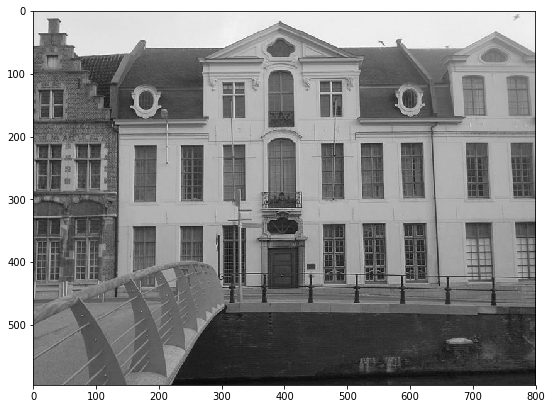

In [39]:
plt.figure(figsize=(9,12))       # verhouding respecteren
plt.imshow(wittehuis, vmin=0, vmax=255, cmap="gray")

### Opdracht 1.1
Doe nu hetzelfde voor de gang in het Koninklijk Atheneum van Etterbeek.

In [32]:
gang =  np.load("../.images/IntroductieDeepLearning/gangKAE.npy")
print(gang)
print(gang.shape)
print(np.min(gang), np.max(gang))

[[222 215 208 ... 202 201 201]
 [216 213 208 ... 202 201 201]
 [215 217 215 ... 202 201 201]
 ...
 [ 54  54  54 ...  61  60  60]
 [ 54  54  54 ...  60  60  59]
 [ 54  54  54 ...  60  59  59]]
(640, 960)
7 255


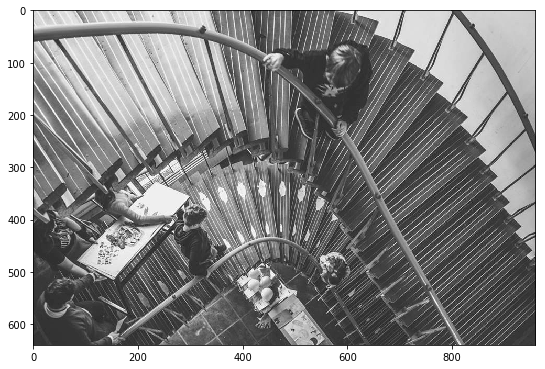

In [33]:
plt.figure(figsize=(9,15))
plt.imshow(gang, vmin=0, vmax=255, cmap="gray")

<div style='color: #690027;' markdown="1">
    <h1>2. Randen detecteren</h1> 
</div>

<div class="alert alert-box alert-info">
<b>Randdetectie zoekt pixels van de afbeelding waar de kleur drastisch verandert.</b> <br>
Nu volgen enkele voorbeelden van filters om randen te detecteren.
</div>


Je zal filters gebruiken met dimensie 3x3.

In [34]:
# filter om randen te detecteren
rand_filter = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])      

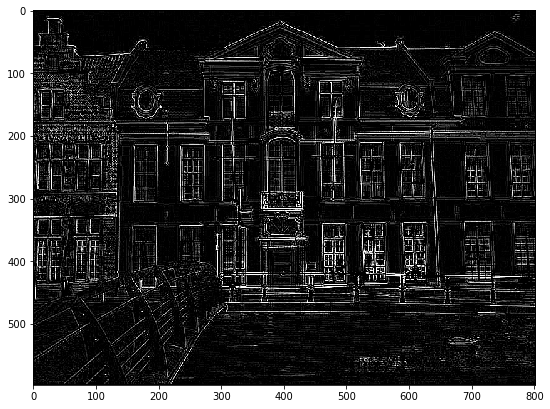

In [35]:
wittehuis_randen = scipy.signal.convolve2d(wittehuis, rand_filter)  # convolutie uitvoeren met rand_filter op foto wittehuis

# resultaat van convolutie tonen 
plt.figure(figsize=(9,12))
plt.imshow(wittehuis_randen, vmin=0, vmax=255, cmap="gray")         

### Opdracht 2.1
Doe nu hetzelfde voor de gang in het Koninklijk Atheneum van Etterbeek.

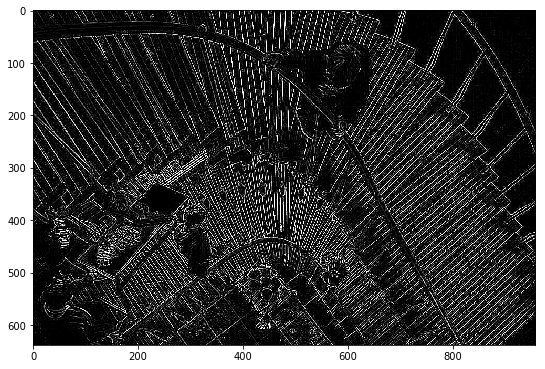

In [37]:
gang_randen = scipy.signal.convolve2d(gang, rand_filter)

# resultaat van convolutie tonen
plt.figure(figsize=(9,15))
plt.imshow(gang_randen, vmin = 0, vmax =255, cmap="gray")

<div style='color: #690027;' markdown="1">
    <h1>3. Verticale lijnen detecteren</h1> 
</div>

In [38]:
# filters om verticale lijnen te detecteren
vertic_filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

(214, 320)


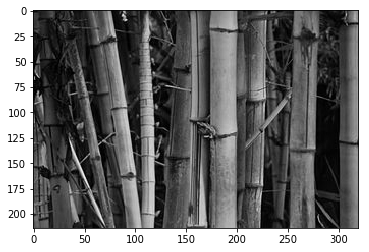

In [56]:
bamboe =  np.load("../.images/IntroductieDeepLearning/bamboe.npy")
print(bamboe.shape)
plt.imshow(bamboe, vmin=0, vmax=255, cmap="gray")

Bron: Sean McGrath from Saint John, NB, Canada [CC BY 2.0 (https://creativecommons.org/licenses/by/2.0)], via Wikimedia Commons

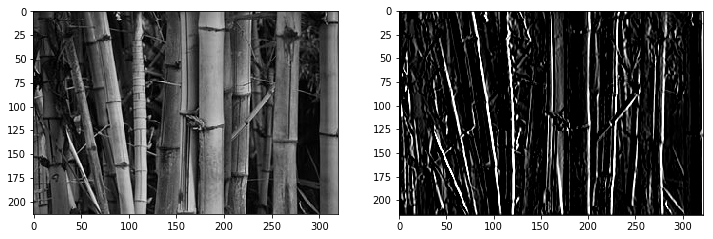

In [70]:
bamboe_vertic = scipy.signal.convolve2d(bamboe, vertic_filter)

plt.figure(figsize=(12,18))
plt.subplot(1,2,1)
plt.imshow(bamboe, vmin=0, vmax=255, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(bamboe_vertic, vmin=0, vmax=255, cmap="gray")

### Opdracht 3.1
Doe nu hetzelfde voor het wittehuis van Sint-Bavo en de gang van het KAE.

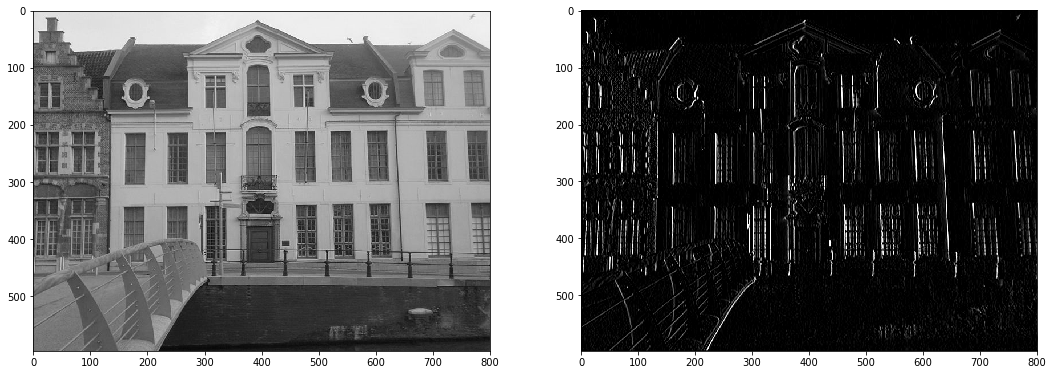

In [67]:
wittehuis_vertic = scipy.signal.convolve2d(wittehuis, vertic_filter)

plt.figure(figsize=(18,24))
plt.subplot(1,2,1)
plt.imshow(wittehuis, vmin=0, vmax=255, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(wittehuis_vertic, vmin=0, vmax=255, cmap="gray")

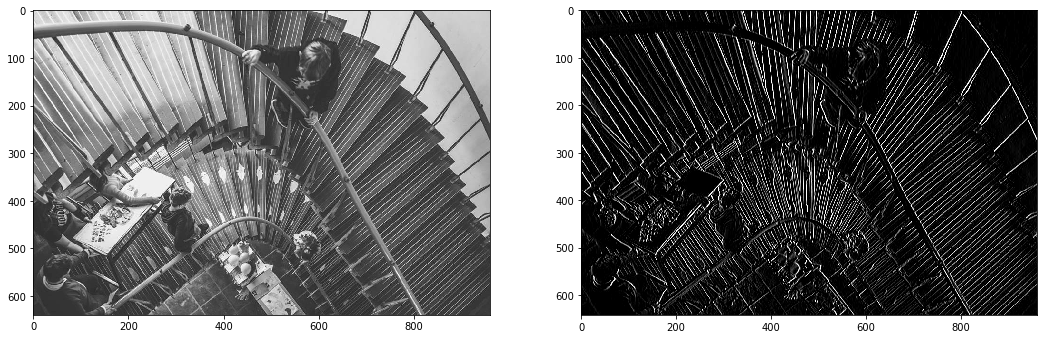

In [66]:
gang_vertic = scipy.signal.convolve2d(gang, vertic_filter)

plt.figure(figsize=(18,30))
plt.subplot(1,2,1)
plt.imshow(gang, vmin=0, vmax=255, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(gang_vertic, vmin=0, vmax=255, cmap="gray")

<div style='color: #690027;' markdown="1">
    <h1>4. Foto verzachten</h1> 
</div>

In [79]:
smooth_filter = np.array([[1, 1, 1], [1, 5, 1], [1, 1, 1]])

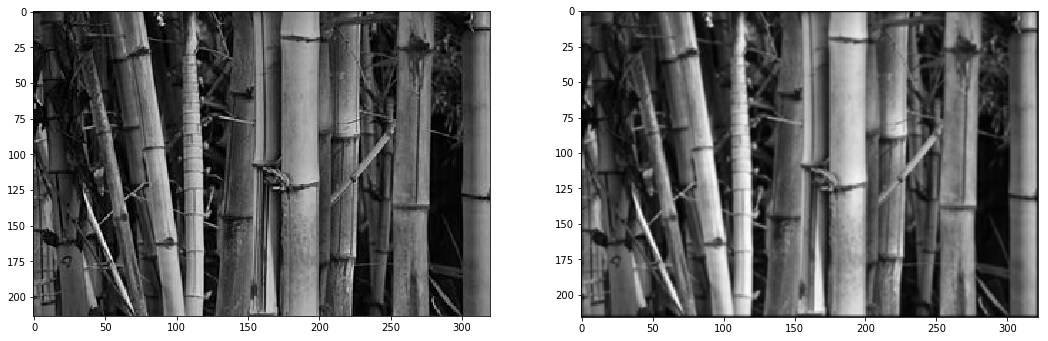

In [91]:
bamboe_zacht = scipy.signal.convolve2d(bamboe, smooth_filter)

plt.figure(figsize=(18,24))
plt.subplot(1,2,1)
plt.imshow(bamboe, vmin=0, vmax=255, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(bamboe_zacht, cmap="gray")

Twee convoluties na elkaar:

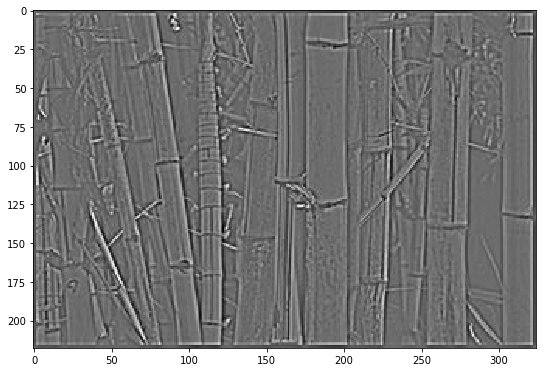

In [101]:
bamboe_zacht_randen = scipy.signal.convolve2d(bamboe_zacht, rand_filter)
plt.figure(figsize=(9,12))
plt.imshow(bamboe_zacht_randen, cmap="gray")

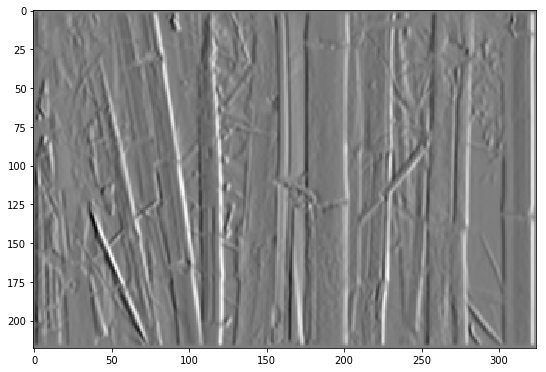

In [102]:
bamboe_vertic_zacht = scipy.signal.convolve2d(bamboe_vertic, smooth_filter)
plt.figure(figsize=(9,12))
plt.imshow(bamboe_vertic_zacht, cmap="gray")

<div style='color: #690027;' markdown="1">
    <h1>5. Convolutie toepassen op foto van huidmondjes</h1> 
</div>

In [71]:
koffieplant =  np.load("../.images/IntroductieDeepLearning/koffieplant.npy")
print(koffieplant)
print(koffieplant.shape)

[[125 145 131 ... 187 183 181]
 [145 145 147 ... 174 160 152]
 [165 145 154 ... 156 143 136]
 ...
 [141 172 160 ... 177 152 171]
 [137 176 163 ... 181 175 177]
 [133 180 169 ... 175 186 169]]
(600, 800)


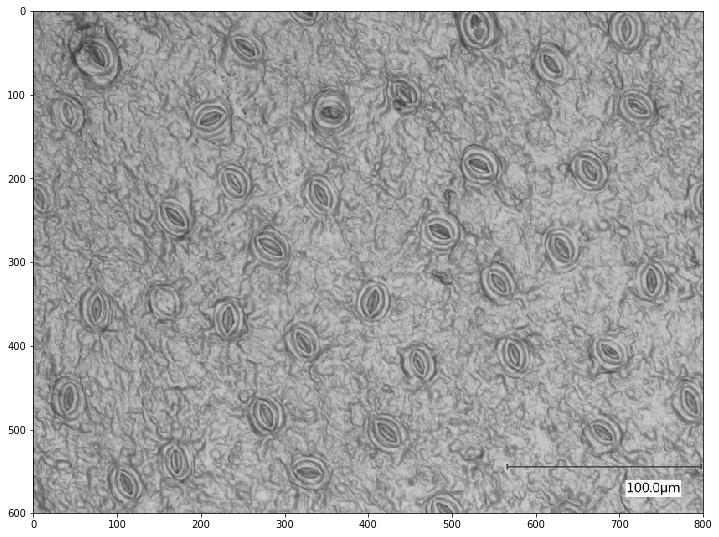

In [77]:
plt.figure(figsize=(12,16))
plt.imshow(koffieplant, vmin=0, vmax=255, cmap="gray")

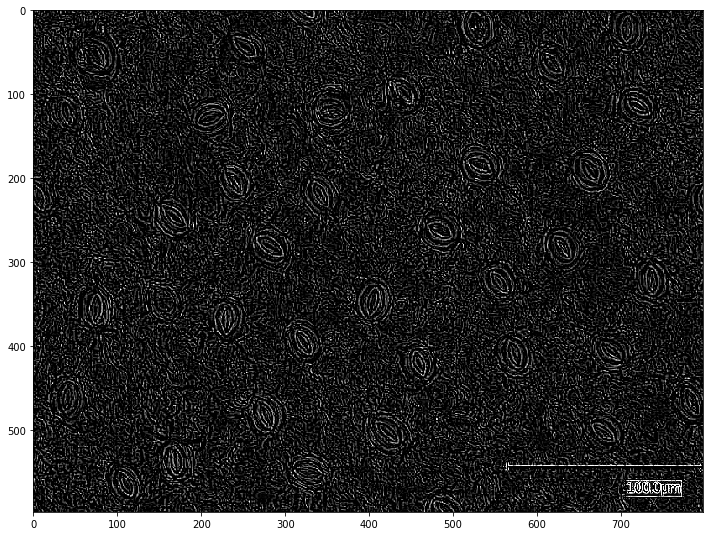

In [78]:
koffieplant_randen = scipy.signal.convolve2d(koffieplant, rand_filter, "valid")
plt.figure(figsize=(12,16))
plt.imshow(koffieplant_randen, vmin=0, vmax=255, cmap="gray")

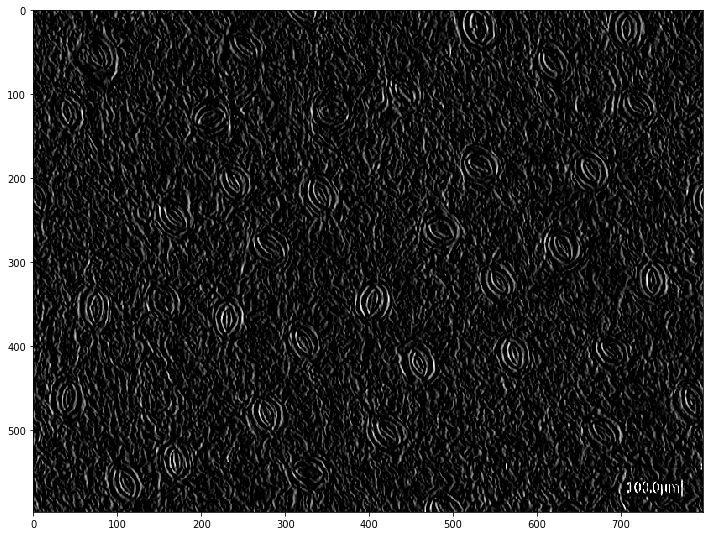

In [74]:
koffieplant_vertic = scipy.signal.convolve2d(koffieplant, vertic_filter, 'valid')
plt.figure(figsize=(12,16))
plt.imshow(koffieplant_vertic, vmin=0, vmax=255, cmap="gray")

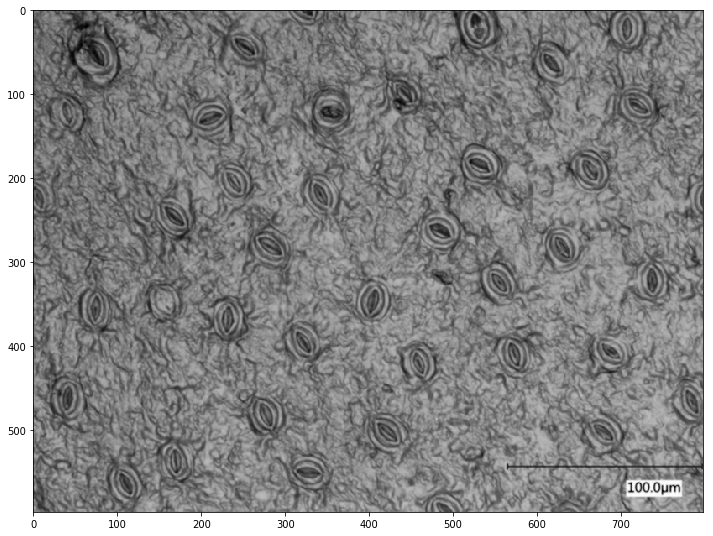

In [84]:
koffieplant_zacht= scipy.signal.convolve2d(koffieplant, smooth_filter, "valid")
plt.figure(figsize=(12,16))
plt.imshow(koffieplant_zacht, cmap="gray")

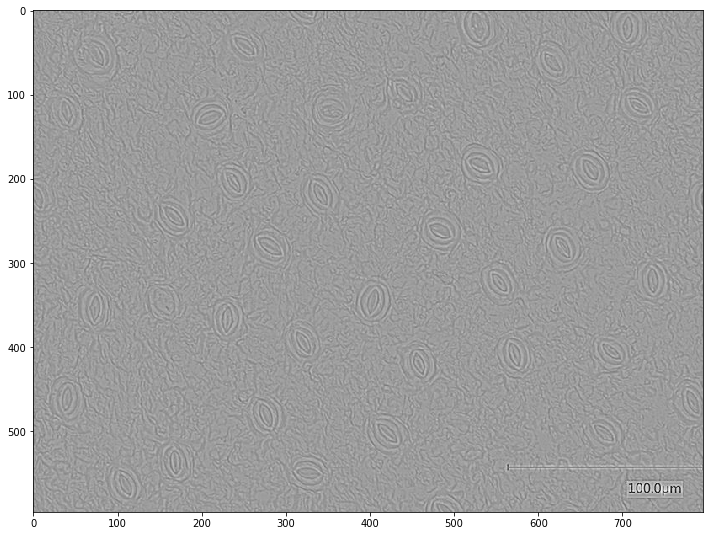

In [103]:
koffieplant_zacht_rand = scipy.signal.convolve2d(koffieplant_zacht, rand_filter, "valid")
plt.figure(figsize=(12,16))
plt.imshow(koffieplant_zacht_rand, cmap="gray")

<div style='color: #690027;' markdown="1">
    <h1>6. Contrast verhogen</h1> 
</div>

In [93]:
print(np.min(koffieplant_zacht_rand), np.max(koffieplant_zacht_rand))

-7418 4778


(array([1., 0., 0., ..., 0., 1., 1.]),
 array([-7418.    , -7415.5608, -7413.1216, ...,  4773.1216,  4775.5608,
         4778.    ]),
 <a list of 5000 Patch objects>)

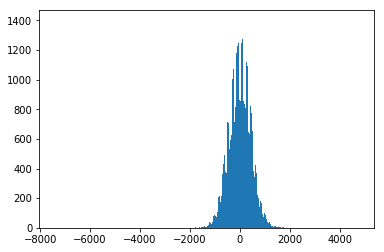

In [94]:
plt.hist(koffieplant_zacht_rand.ravel(), bins = 5000)

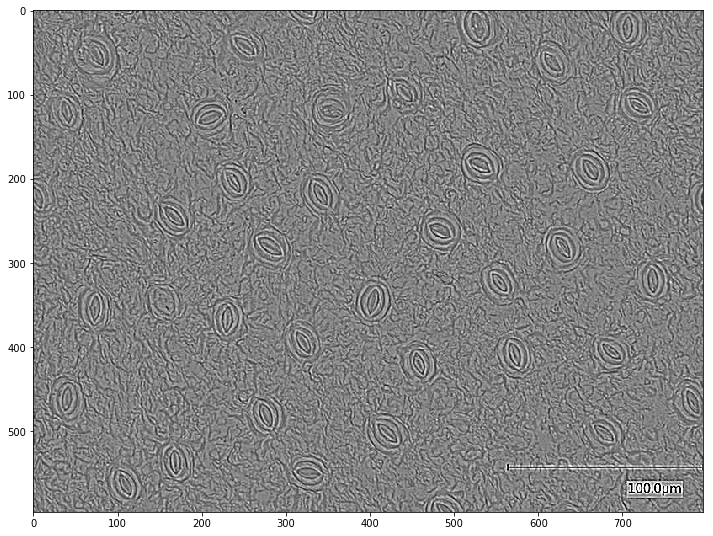

In [88]:
koffieplant_zacht_rand = scipy.signal.convolve2d(koffieplant_zacht, rand_filter, "valid")
plt.figure(figsize=(12,16))
plt.imshow(koffieplant_zacht_rand, vmin=-2000, vmax=2000, cmap="gray")

### Opdracht 5.1
Maak het contrast groter na randdetectie alleen.

In [ ]:
plt.hist(koffieplant_randen.ravel(), bins = 2000)

<div style='color: #690027;' markdown="1">
    <h1>6. Nog enkele filters om uit te testen</h1> 
</div>

In [95]:
scherp_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

In [ ]:
plt.figure(figsize=(12,16))
plt.imshow(koffieplant_randen, vmin=-300, vmax=300, cmap="gray")

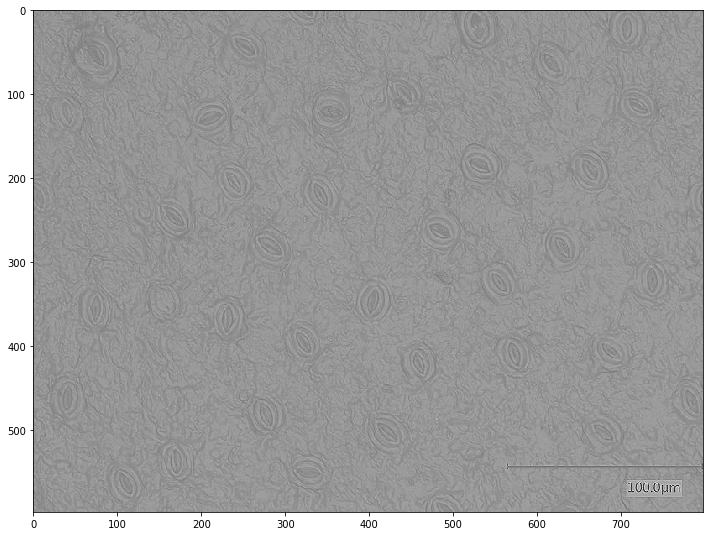

In [97]:
koffieplant_scherp = scipy.signal.convolve2d(koffieplant, scherp_filter, "valid")
plt.figure(figsize=(12,16))
plt.imshow(koffieplant_scherp,  cmap="gray")

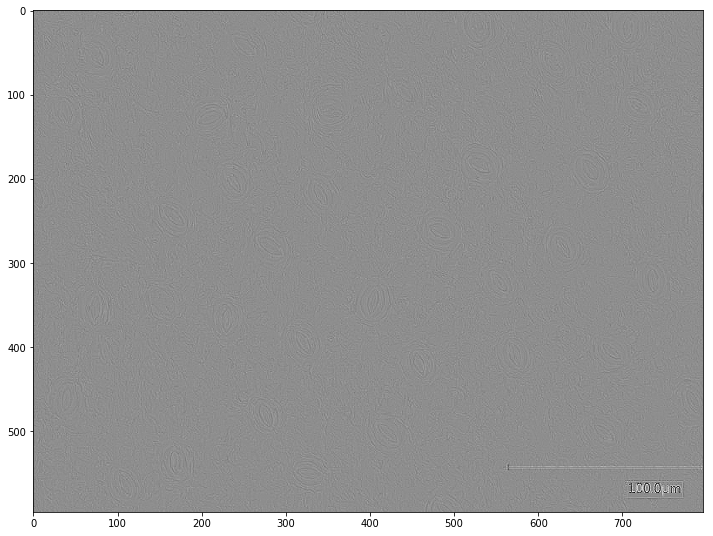

In [107]:
koffieplant_randen2 = scipy.signal.convolve2d(koffieplant_scherp, rand_filter, "valid")
plt.figure(figsize=(12,16))
plt.imshow(koffieplant_randen2, cmap="gray")

In [111]:
edge_filter = np.array([[-1, -2, -1], [-2, 12, -2], [-1, -2, -1]]) * 1/16

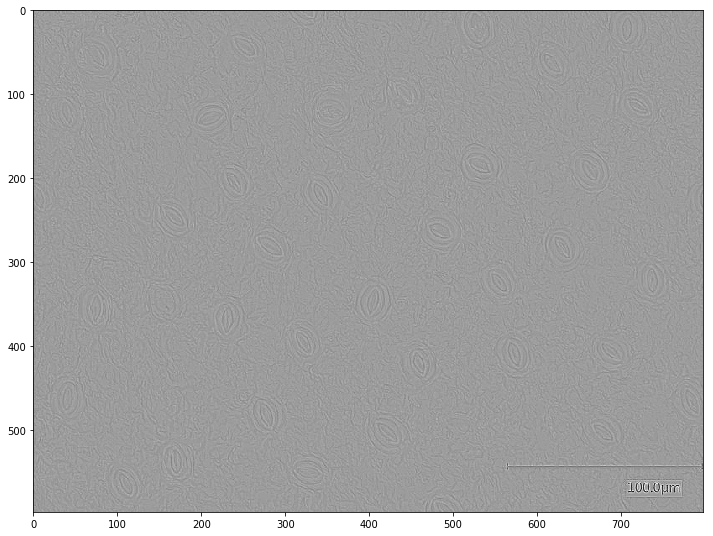

In [112]:
koffieplant_edge = scipy.signal.convolve2d(koffieplant, edge_filter, "valid")
plt.figure(figsize=(12,16))
plt.imshow(koffieplant_edge,  cmap="gray")

<div class="alert alert-box alert-success">
Convoluties worden toegepast in de zogenaamde convolutionele netwerken. Dit zijn diepe neurale netwerken die uitermate geschikt zijn voor beeldherkenning. In de verschillende layers van het neurale netwerk gaat men op zoek naar kenmerken die steeds complexer worden. In de eerste layer gaat men bv. op zoek naar randen, in een diepere layer naar een ovaal. Om die kenmerken te detecteren gebruikt men filters die men over het beeld laat glijden.
</div>

<img src="../.images/cclic.png" alt="Banner" align="left" style="width:80px;"/><br><br>
Notebook KIKS, zie <a href="http://www.aiopschool.be">ai op school</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 